## implementation of Kmeans dataset

In [12]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import adjusted_rand_score,silhouette_score
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [2]:
iris = load_iris()
X = iris.data
y=iris.target
df = pd.DataFrame(X,columns=iris.feature_names)
df['target']=y
df['species']=df['target'].apply(lambda x:iris.target_names[x])

In [3]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [4]:
X = df.drop('species',axis=1)
y=df['species']

In [5]:
le = LabelEncoder()

In [6]:
y_true = le.fit_transform(y)


In [9]:
kmeans = KMeans(n_clusters=3,random_state=42,n_init=10)
y_pred = kmeans.fit_predict(X)

In [10]:
ari_kmeans = adjusted_rand_score(y_pred,y_true)
sil_kmeans = silhouette_score(X,y_pred)



In [11]:
print("======Kmeans clustering===========")
print(f"adjusted_rand_score : {ari_kmeans:.3f}")
print(f"silhouette_score : {sil_kmeans:.3f}")

======Kmeans clustering===========
adjusted_rand_score : 0.980
silhouette_score : 0.582


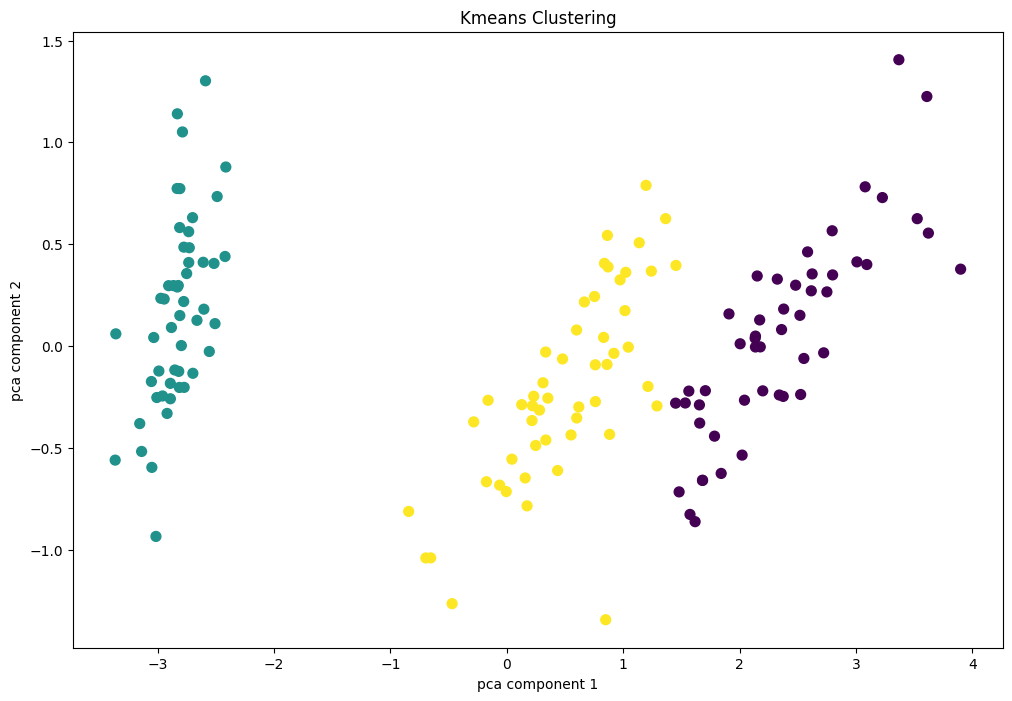

In [15]:
pca = PCA(n_components=2)
x_pca = pca.fit_transform(X)
plt.figure(figsize=(12,8))
plt.scatter(x_pca[:,0],x_pca[:,1],c=y_pred,cmap='viridis',s=50)
plt.title("Kmeans Clustering")
plt.xlabel("pca component 1")
plt.ylabel("pca component 2")
plt.show()